### Neural Network


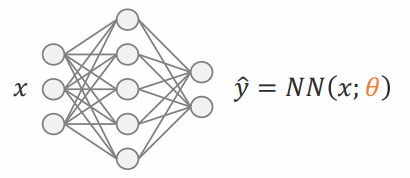

Entrando com os dados de treino, encontramos a função(com os parâmetros reflexiveis \theta) o qual aproxima uma função por:

$$
\hat{y} = NN(x;\theta) \approx y(x)
$$

Para fitar, pode se usar métodos mínimos quadrados,

$$
\theta^{*} = min_{\theta}\sum^{N}_{i}(NN(x_{i};\theta) - y_{i})^{2}
$$

Muitas vezes não existe solução análitica para a equação acima, então, podemos usar algum método para otimizar:

$$
\theta_{j} \leftarrow \theta_{j} - \gamma \frac{\partial L(\theta)}{\partial \theta_{j}}\\
L(\theta) = \sum^{N}_{i}NN((x_i;\theta) - y_i)^2
$$


Onde $\gamma$ é a learning rate (taxa de aprendizado) e $L(\theta)$ é Loss Function (função de perda).

#### MLP
A arquitetura mais simples, por exemplo:
$$
NN(x;\theta) = W_{2}\sigma(W_2 + b_1) + b_2
$$
onde
* $x$ é o vetor de entrada;
* $W_i$ são as matrizes de aprendizado;
* $b_i$ são os vetores de viés;
* $\sigma$ é a função de ativação como $\sigma = \tan()$

#### Rede neural convolucional

Ela tem correlações espaciais nos inputs

$$
NN(x;\theta) = W_3 * (\sigma(W_2 * \sigma (W_1 * x + b_1)+b_2) + b_3\\
h = W_1 * x + b_1\\
h_{ij} = \sum^{l}_{i'}\sum^{m}_{j'}W_{i'j'}x_{i+i', j+j'}+b
$$



#### Treinamento de rede neural

$$
\theta_{j} \leftarrow \theta_{j} - \gamma \frac{\partial L(\theta)}{\partial \theta_{j}}\\
L(\theta) = \sum^{N}_{i}NN((x_i;\theta) - y_i)^2
$$

Seja
$$
\frac{\partial L(\theta)}{\partial \theta_j} = \sum^{N}_{i} 2(NN(x;\theta) - y_i)\frac{\partial NN(x_i;\theta)}{\partial \theta_j}
$$

A rede neural

$$
NN(x;\theta) = W_3(\sigma W_2 \sigma(W_1 x + b_1) + b_2) + b_3\\
g = W_2 \sigma(W_1 x + b_1) + b_2\\
h = W_1 x + b_1
$$

Usando a regra da cadeia em $\frac{\partial NN}{\partial W_1}$
$$
\frac{\partial NN}{\partial W_1} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial h}\frac{\partial h}{\partial W_1}
$$


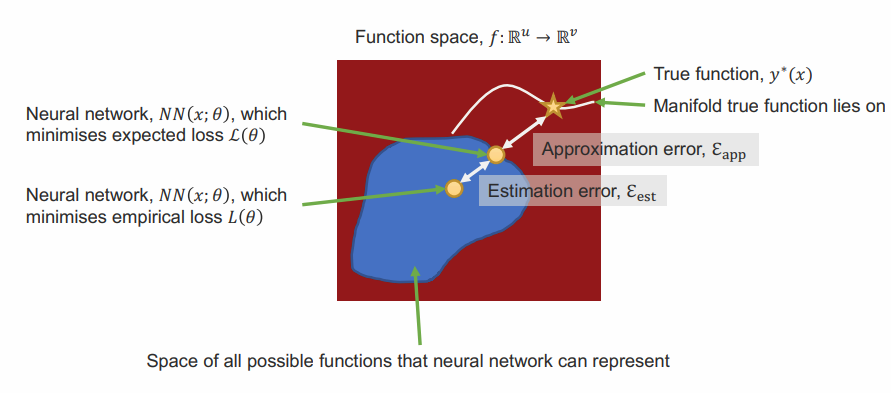

# Weight Regularisation (Regularização de Pesos)

## Ideia simples  
Preferir pesos que sejam próximos de **0**:

$$
L(\theta) = \frac{1}{N} \sum_{i=1}^{N} (NN(x_i; \theta) - y_i)^2 + \lambda \|\theta\|^2
$$

Assim, a rede aprende a **remover (podar) conexões desnecessárias**.


## Perspectiva probabilística

Assuma que  
$$
\hat{p}(y \mid x, \theta)
$$  
segue uma **distribuição normal**:

$$
\hat{p}(y \mid x, \theta) = \mathcal{N}(y; \mu = NN(x; \theta), \sigma = 1)
$$

Agora, suponha que cada ponto de treino é **independente e identicamente distribuído (iid)**. Então, a **verossimilhança dos dados** pode ser escrita como:

$$
\hat{p}(D \mid \theta) = p(x_1, y_1, \dots, x_N, y_N \mid \theta) = \prod_i \hat{p}(y_i \mid x_i, \theta)
$$


## Assumindo um prior nos parâmetros da rede

Agora, assuma um **prior** sobre os parâmetros da rede:

$$
\hat{p}(\theta_j) = \mathcal{N}(\theta_j; \mu = 0, \sigma = \sigma)
\quad \Rightarrow \quad
\hat{p}(\theta) = \prod_j \hat{p}(\theta_j)
$$

Ou seja, os pesos são **iid com distribuição normal**.


## Distribuição a posteriori dos parâmetros

Pela **regra de Bayes**:

$$
\hat{p}(\theta \mid D) = \frac{\hat{p}(D \mid \theta)\hat{p}(\theta)}{\hat{p}(D)}
$$

Usamos então a **estimativa MAP (Maximum A Posteriori)** para estimar \(\theta^*\):

$$
\theta^* = \arg\max_{\theta} \hat{p}(\theta \mid D)
$$

Substituindo as distribuições:

$$
= \max_{\theta} \prod_i e^{-\frac{1}{2}(NN(x_i; \theta) - y_i)^2}
\prod_j e^{-\frac{1}{2}\left(\frac{\theta_j - 0}{\sigma}\right)^2}
$$

Isso é equivalente a:

$$
= \min_{\theta} \sum_i (NN(x_i; \theta) - y_i)^2 + \lambda \|\theta\|^2
$$


Regularização L2 (weight decay) é o mesmo que assumir que os pesos da rede vêm de uma **distribuição normal centrada em zero** e fazer **MAP estimation**.
